In [42]:
import pickle
import pandas as pd

In [43]:
results_matrix = pd.DataFrame(columns=['Model','Dataset','Weeks-ahead Forecast','MSE_train','RMSE_train','MAE_train','MSE_test','RMSE_test','MAE_test'])

In [44]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test


In [45]:
pickle.dump(results_matrix, open(r"..\data\results_matrix.pkl", "wb" ))

In [46]:
results_matrix = pickle.load(open(r"..\data\results_matrix.pkl", "rb" ))

In [47]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test


In [10]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# def evaluate_model(model, test, predictions_test, train=None, predictions_train=None):
#     """
#     Calculate MSE_train, RMSE_train, MAE_train, and MSE_test, RMSE_test, MAE_test to evaluate time series forecast

#     MSE - weights large errors more than smaller ones, good for penalizing large errors, loses unit because squared
#     RMSE - more interpretable than MSE because avoids losing units, also penalizes large errors
#     MAE - doesn't penalize large errors as much

#     Args:
#         train (list of int, optional): values of the training set
#         test (list of int): values of the test set
#         predictions_train (list of int, optional): predicted values for the training set
#         predictions_test (list of int, optional): predicted values for the test set

#     Returns:
#         print out of training and test scores

#    """ 
#     results = []

#     if train.any():
#         # Evaluate training set
#         MSE_train = round(mean_squared_error(train, predictions_train),3)
#         RMSE_train = round(mean_squared_error(train, predictions_train, squared=False),3)
#         MAE_train = round(mean_absolute_error(train, predictions_train),3)

#         results.append(MSE_train)
#         results.append(RMSE_train)
#         results.append(MAE_train)
        
#         print(f'Train MSE: {MSE_train}')
#         print(f'Train RMSE: {RMSE_train}')
#         print(f'Train MAE: {MAE_train}')

        
#     # Evaluate test set
#     MSE_test = round(mean_squared_error(test, predictions_test),3)
#     RMSE_test = round(mean_squared_error(test, predictions_test, squared=False),3)
#     MAE_test = round(mean_absolute_error(test, predictions_test),3)

#     results.append(MSE_test)
#     results.append(RMSE_test)
#     results.append(MAE_test)
    
#     print(f'Test MSE: {MSE_test}')
#     print(f'Test RMSE: {RMSE_test}')
#     print(f'Test MAE: {MAE_test}')

    

#     return results

In [11]:
# import inspect

# def retrieve_name(var):
#     callers_local_vars = inspect.currentframe().f_back.f_locals.items()
#     return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

In [12]:
# def get_df_name(df):
#     name =[x for x in globals() if globals()[x] is df][0]
#     return name

In [24]:
# import numpy as np
# import pandas as pd
# import pickle
# from sklearn.ensemble import RandomForestRegressor
# seed_value = 2022

# from sklearn.preprocessing import StandardScaler

# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# plt.rcParams['figure.figsize'] = [20, 10]

# import sys
# sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
# from evaluate_model import *
# # from retrieve_name import *
# # from get_df_name import *

# def rf_model(data, weeks_to_predict, max_depth):
#     """
#         Split data, then train, fit, evaluate and plot an Random Forest model for a specified number of weeks ahead to forecast
        
#         Args:
#             data (dataframe with DatetimeIndex): time series to train and validate model on
#             weeks_to_predict (int): number of weeks ahead to predict
#             max_depth (int): The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
            
#         Returns:
#             printout of shape of training X and y, shape of test X and y, plot of forecast, result_matrix with MSE, RMSE, MAE for train and test sets appended

#     """ 
#     # split into train and test
#     X = data.loc[:, data.columns != 'Total Cases']
#     y = data['Total Cases']

#     if weeks_to_predict == 1:
#         train_X = X.iloc[:-weeks_to_predict].to_numpy()
#         train_y = y.iloc[:-weeks_to_predict].to_numpy().reshape(-1,1)
#         test_X = X.iloc[-weeks_to_predict].to_numpy().reshape(1,-1)
#         test_y = np.asarray(y.iloc[-weeks_to_predict]).reshape(1,-1)
#     else:
#         train_X = X.iloc[:-weeks_to_predict].to_numpy()
#         train_y = y.iloc[:-weeks_to_predict].to_numpy().reshape(-1,1)
#         test_X = X.iloc[-weeks_to_predict:].to_numpy()
#         test_y = np.asarray(y.iloc[-weeks_to_predict:]).reshape(-1,1)

#     print(f'Shape of train_X: {train_X.shape}')
#     print(f'Shape of train_y: {train_y.shape}')
#     print(f'Shape of test_X: {test_X.shape}')
#     print(f'Shape of test_y: {test_y.shape}')

#     # scale data
#     scaler = StandardScaler()
#     train_X = scaler.fit_transform(train_X)
#     test_X = scaler.transform(test_X)

#     # instantiate model
#     rf = RandomForestRegressor(max_depth=max_depth, random_state=seed_value)

#     # fit the model
#     rf.fit(train_X, train_y.ravel())

#     # predict for train and test sets
#     preds_test = rf.predict(test_X)
#     preds_train = rf.predict(train_X)

#     # print(preds_test.shape)
#     # print(preds_train.shape)

#     # plot
#     plt.plot(data.index, data['Total Cases'].values)
#     plt.plot(data.index[-weeks_to_predict:], preds_test, color='red')

#     # results = []



#     # if train_X.any():
#     #     # Evaluate training set
#     #     MSE_train = round(mean_squared_error(train_y, preds_train),3)
#     #     RMSE_train = round(mean_squared_error(train_y, preds_train, squared=False),3)
#     #     MAE_train = round(mean_absolute_error(train_y, preds_train),3)

#     #     results.append(MSE_train)
#     #     results.append(RMSE_train)
#     #     results.append(MAE_train)
   
#     # # Evaluate test set
#     # MSE_test = round(mean_squared_error(test_y, preds_test),3)
#     # RMSE_test = round(mean_squared_error(test_y, preds_test, squared=False),3)
#     # MAE_test = round(mean_absolute_error(test_y, preds_test),3)

#     # results.append(MSE_test)
#     # results.append(RMSE_test)
#     # results.append(MAE_test)

#     results = evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

#     results.insert(0, retrieve_name(rf))
#     results.insert(1, get_df_name(data))
#     results.insert(2, weeks_to_predict)

#     results_matrix = pickle.load(open(r"..\data\results_matrix.pkl", "rb" ))

#     results_matrix = pd.concat([results_matrix.T, pd.Series(results, index=results_matrix.columns)], axis=1).T

#     pickle.dump(results_matrix, open(r"..\data\results_matrix.pkl", "wb" ))

#     return results_matrix

In [39]:
import sys
sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
from rf_model import *

In [40]:
df_flu_symptoms_pre_COVID = pickle.load(open(r"..\data\google_trend\df_flu_symptoms_pre_COVID.pkl", "rb" ))

Shape of train_X: (234, 11)
Shape of train_y: (234, 1)
Shape of test_X: (1, 11)
Shape of test_y: (1, 1)


IndexError: list index out of range

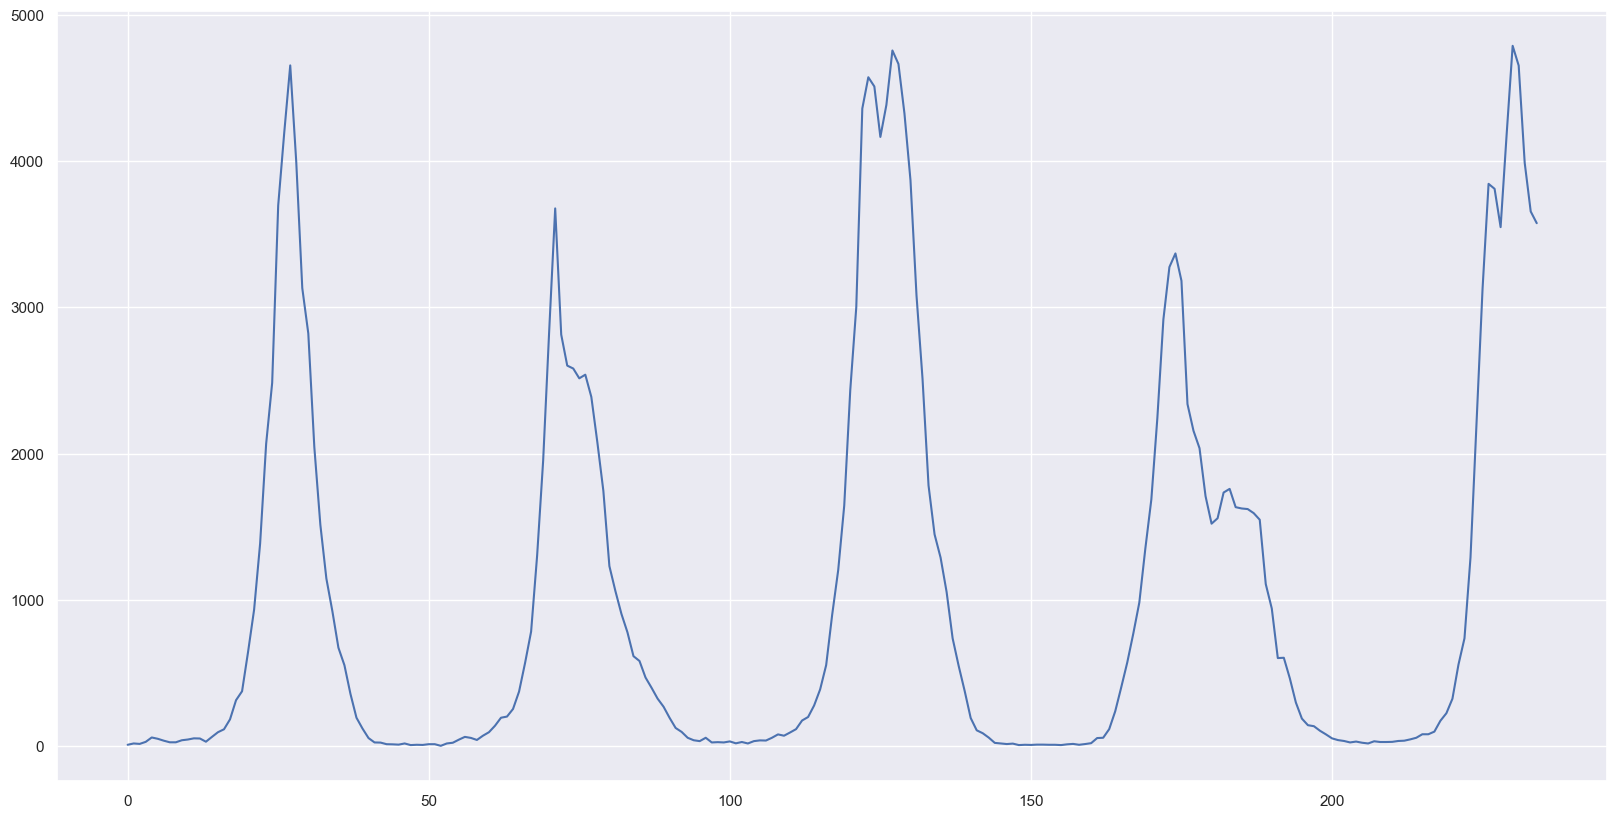

In [41]:
results_matrix = rf_model(data = df_flu_symptoms_pre_COVID, weeks_to_predict = 1 , max_depth=2)

In [26]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test
0,rf,df_flu_symptoms_pre_COVID,1,208978.844,457.142,286.683,435719.268,660.09,660.09


Shape of train_X: (233, 11)
Shape of train_y: (233, 1)
Shape of test_X: (2, 11)
Shape of test_y: (2, 1)


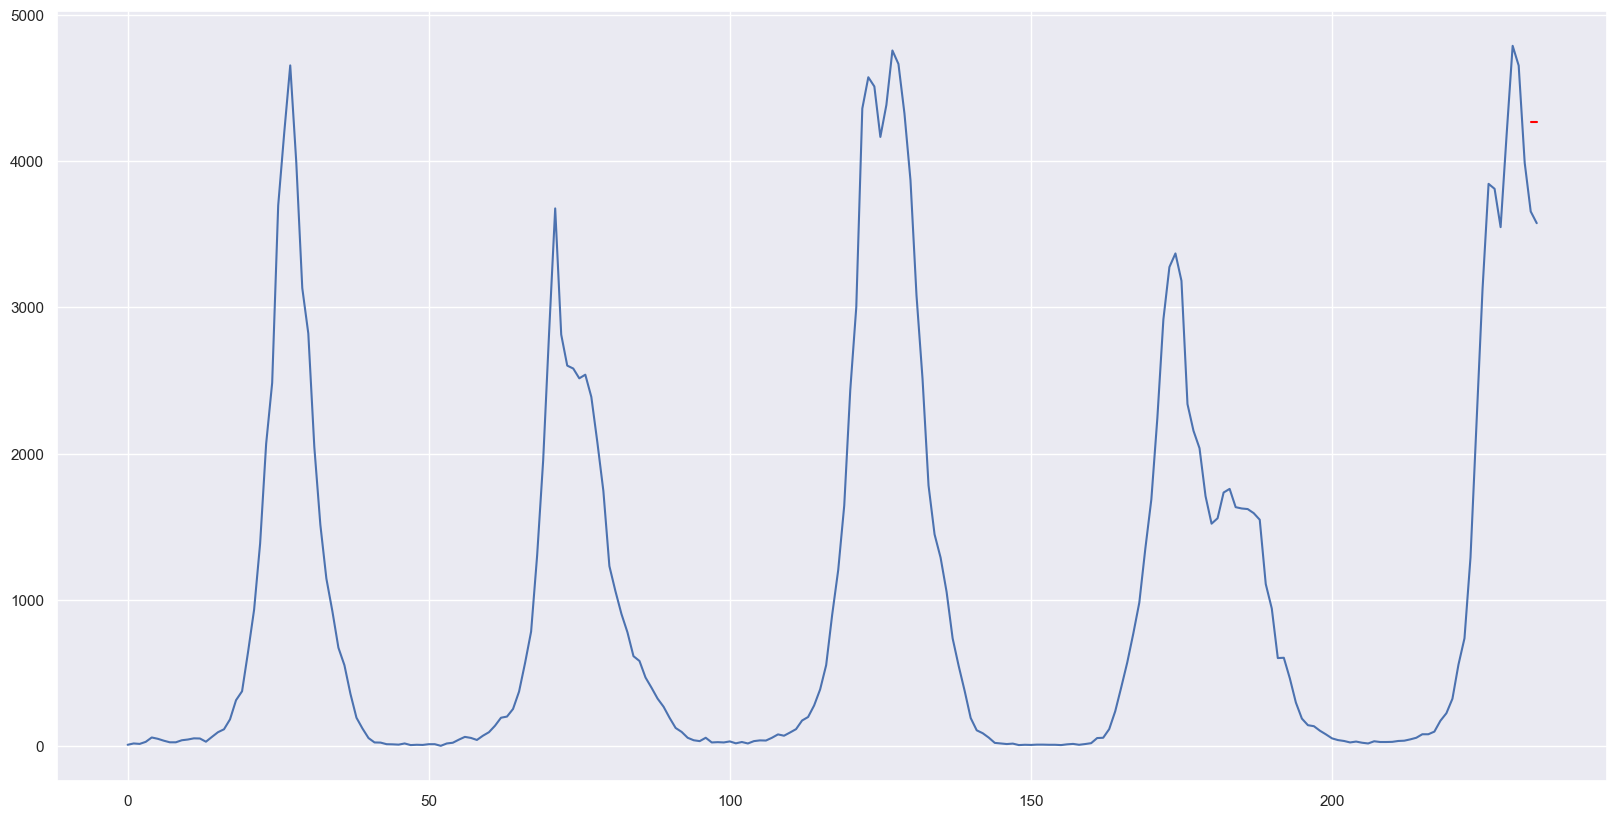

In [27]:
results_matrix = rf_model(data = df_flu_symptoms_pre_COVID, weeks_to_predict = 2 , max_depth=2)

In [28]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test
0,rf,df_flu_symptoms_pre_COVID,1,208978.844,457.142,286.683,435719.268,660.09,660.09
0,rf,df_flu_symptoms_pre_COVID,2,207860.258,455.917,283.864,424747.631,651.727,650.498


Shape of train_X: (232, 11)
Shape of train_y: (232, 1)
Shape of test_X: (3, 11)
Shape of test_y: (3, 1)


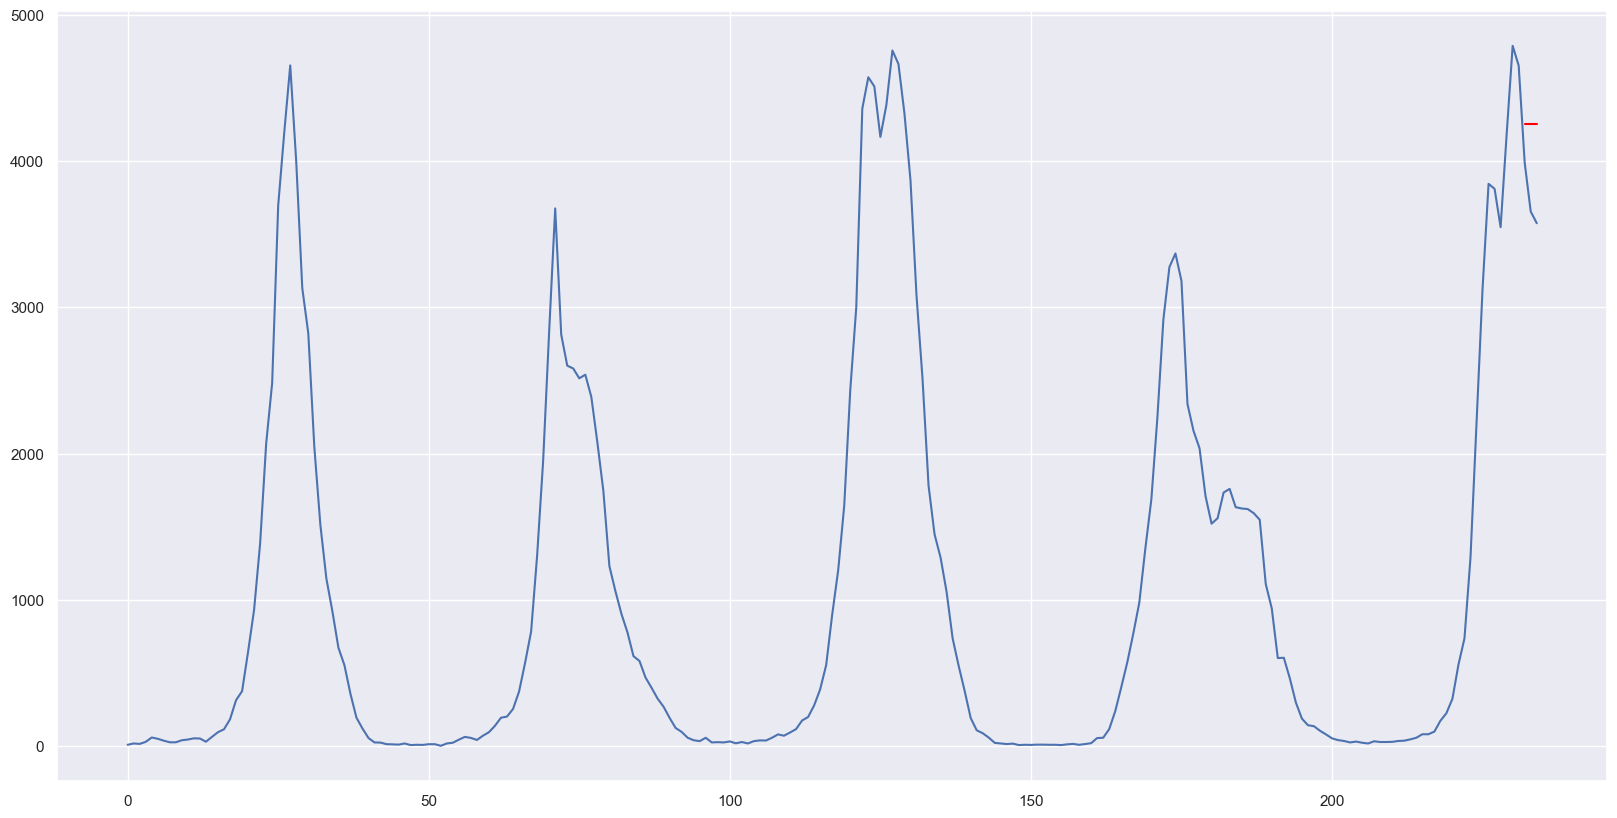

In [29]:
results_matrix = rf_model(data = df_flu_symptoms_pre_COVID, weeks_to_predict = 3 , max_depth=2)

In [30]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test
0,rf,df_flu_symptoms_pre_COVID,1,208978.844,457.142,286.683,435719.268,660.09,660.09
0,rf,df_flu_symptoms_pre_COVID,2,207860.258,455.917,283.864,424747.631,651.727,650.498
0,rf,df_flu_symptoms_pre_COVID,3,208773.141,456.917,285.484,295923.824,543.989,513.751


Shape of train_X: (231, 11)
Shape of train_y: (231, 1)
Shape of test_X: (4, 11)
Shape of test_y: (4, 1)


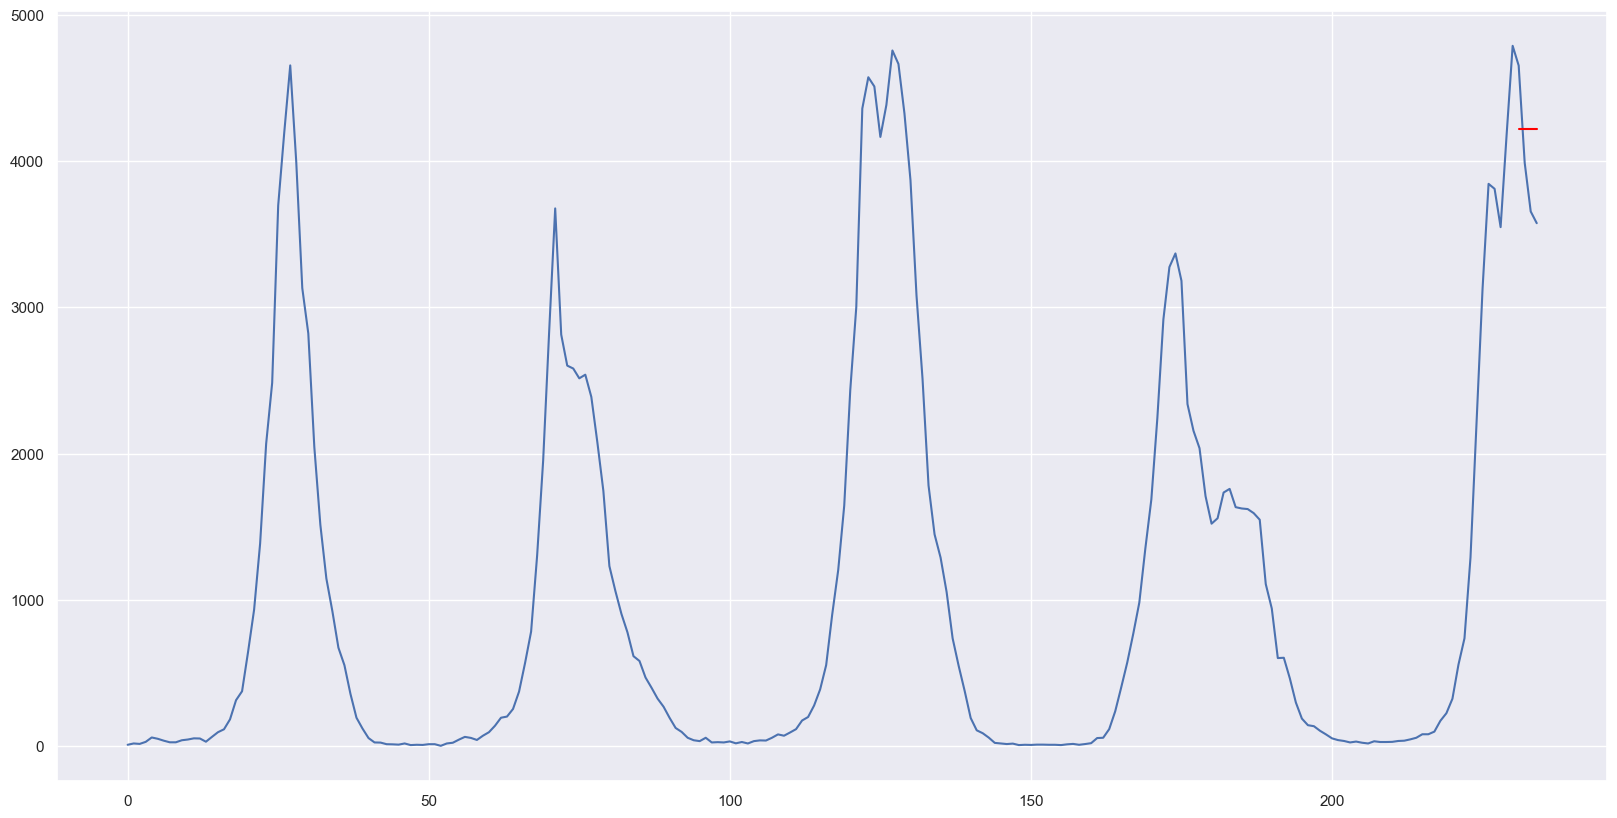

In [31]:
results_matrix = rf_model(data = df_flu_symptoms_pre_COVID, weeks_to_predict = 4 , max_depth=2)

In [32]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test
0,rf,df_flu_symptoms_pre_COVID,1,208978.844,457.142,286.683,435719.268,660.09,660.09
0,rf,df_flu_symptoms_pre_COVID,2,207860.258,455.917,283.864,424747.631,651.727,650.498
0,rf,df_flu_symptoms_pre_COVID,3,208773.141,456.917,285.484,295923.824,543.989,513.751
0,rf,df_flu_symptoms_pre_COVID,4,214788.783,463.453,288.606,243593.986,493.552,468.207


In [112]:
import inspect

print(inspect.signature(rf_model))

(data, weeks_to_predict, max_depth)


Shape of train_X: (234, 11)
Shape of train_y: (234, 1)
Shape of test_X: (1, 11)
Shape of test_y: (1, 1)
Train MSE: 208978.844
Train RMSE: 457.142
Train MAE: 286.683
Test MSE: 435719.268
Test RMSE: 660.09
Test MAE: 660.09


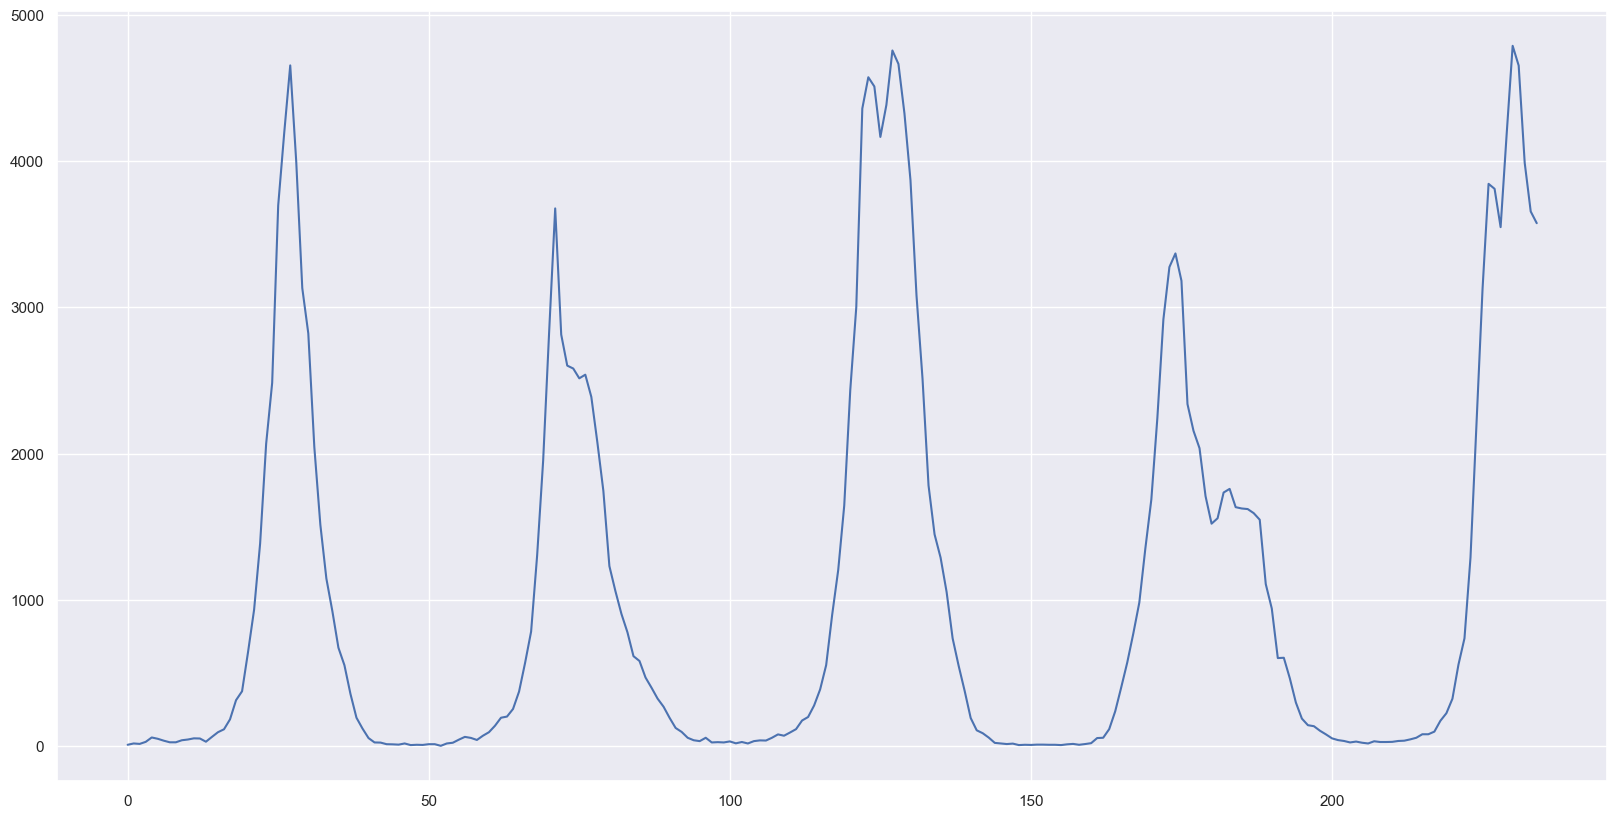

In [20]:
rf_model(data = df_flu_symptoms_pre_COVID, weeks_to_predict = 1 , max_depth=2)

In [6]:
import inspect

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

In [9]:
import pickle
from sklearn.ensemble import RandomForestRegressor
seed_value = 2022
df_flu_symptoms_pre_COVID = pickle.load(open(r"..\data\google_trend\df_flu_symptoms_pre_COVID.pkl", "rb" ))

rf = RandomForestRegressor(max_depth=2, random_state=seed_value)
data = df_flu_symptoms_pre_COVID
weeks_to_predict = 1
w = 1

In [13]:
retrieve_name(rf)+'_'+retrieve_name(data)+'_'+str(weeks_to_predict)

'rf_df_flu_symptoms_pre_COVID_1'

In [ ]:
import pandas

results = pd.DataFrame()

In [11]:
str(rf) + f'{data}'

'RandomForestRegressor(max_depth=2, random_state=2022)     Total Cases  body_aches  chills  cough  diarrhea  fatigue  fever  flu  \\\n0            9.0          32      31     27        64       74     29    7   \n1           18.0          32      31     27        64       74     29    7   \n2           15.0          32      31     27        64       74     29    7   \n3           29.0          32      31     27        64       74     29    7   \n4           59.0          35      39     37        59       78     29   20   \n..           ...         ...     ...    ...       ...      ...    ...  ...   \n230       4789.0          53      71     46        82       91     58   34   \n231       4654.0          53      71     46        82       91     58   34   \n232       3989.0          53      71     46        82       91     58   34   \n233       3656.0          53      71     46        82       91     58   34   \n234       3576.0          53      71     46        82       91     58   34  

In [6]:
import numpy as np
from numpy import mean
total = [7630,6235,7445,8592,6943,5931]

In [9]:
mean(total)

7129.333333333333